# 4 Components for training a Deep Learning Model
---
1. **Data**
2. **Model**
3. **Loss function**
  <br> $\doteq$ objective function
4. **Optimizer**
  <br> $\to$ performs **Gradient Descent**

## Part 1: Data Loader

In [1]:
!pip install scipy==1.11.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [2]:
!pip install imageio[pyav]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 39.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import os, sys
import tarfile
import matplotlib.pyplot as plt
import imageio.v3 as iio

from IPython.display import display, Image
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from tqdm import tqdm

# Config the matplotlib backend as plotting inline in Ipython
%matplotlib inline

### 1. Download Data

In [4]:
url = 'https://commondatastorage.googleapis.com/books1000/'

data_root = './data'
if not os.path.exists(data_root):
  os.mkdir(data_root)

def dataset_downloader(filename):
  """Download the dataset if it doesn't exist"""
  dset_dir = os.path.join(data_root, filename)

  if not os.path.exists(dset_dir):
    print('Attempt to Download : ', filename)
    filename, _ = urlretrieve(url + filename, dset_dir)
    print(filename, ": Successfully Downloaded!")
  else:
    print(dset_dir, ': already exists.')

  return dset_dir

train_filename = dataset_downloader('notMNIST_large.tar.gz')
test_filename = dataset_downloader('notMNIST_small.tar.gz')

Attempt to Download :  notMNIST_large.tar.gz
./data/notMNIST_large.tar.gz : Successfully Downloaded!
Attempt to Download :  notMNIST_small.tar.gz
./data/notMNIST_small.tar.gz : Successfully Downloaded!


### 2. Unzip the downloaded Dataset

In [5]:
num_classes = 10
np.random.seed(1000)

def data_extract(filename):
  # Removing .tar.gz from filename
  root = os.path.splitext(os.path.splitext(filename)[0])[0]

  if os.path.isdir(root):
    print("{} already exists. - Skipping {}".format(root, filename))
  else:
    print("Extracting data from {}".format(root))

    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close

  data_folders = [
      os.path.join(root, d) for d in sorted(os.listdir(root))
      if os.path.isdir(os.path.join(root, d))]

  if len(data_folders) != num_classes:
    raise Exception("{} folders expected, But {} existing".format(num_classes, len(data_folders)))

  print(data_folders)
  return data_folders

train_folders = data_extract(train_filename)
test_folders = data_extract(test_filename)

Extracting data from ./data/notMNIST_large
['./data/notMNIST_large/A', './data/notMNIST_large/B', './data/notMNIST_large/C', './data/notMNIST_large/D', './data/notMNIST_large/E', './data/notMNIST_large/F', './data/notMNIST_large/G', './data/notMNIST_large/H', './data/notMNIST_large/I', './data/notMNIST_large/J']
Extracting data from ./data/notMNIST_small
['./data/notMNIST_small/A', './data/notMNIST_small/B', './data/notMNIST_small/C', './data/notMNIST_small/D', './data/notMNIST_small/E', './data/notMNIST_small/F', './data/notMNIST_small/G', './data/notMNIST_small/H', './data/notMNIST_small/I', './data/notMNIST_small/J']


### 3. Load data & save to a pickle file

In [6]:
image_size = 28         # Pixel width and height
pixel_depth = 255.0     # Number of levels per pixel

def load_letter(folder):
  """Load a single letter data in a class"""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size), dtype=np.float32)

  num_images = 0

  for image in image_files:
    image_file = os.path.join(folder, image)

    try:
      image_data = (iio.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth

      if image_data.shape != (image_size, image_size):
        raise Exception("Image in wrong shape : {}".format(str(image_data.shape)))

      dataset[num_images, :, :] = image_data
      num_images += 1
    except Exception as e:
      print("{} - skip".format(e))

  dataset = dataset[0:num_images, :, :]
  print("Shape of the whole dataset: ", dataset.shape)

  return dataset


def make_pickle(data_folders):
  dataset_names = []

  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)

    if os.path.exists(set_filename):
      print("{} already exists - skipping this folder".format(set_filename))
      continue

    print("Pickling {}".format(set_filename))

    dataset = load_letter(folder)

    with open(set_filename, 'wb') as f:
      pickle.dump(dataset, f)

  return dataset_names

train_datasets = make_pickle(train_folders)
test_datasets = make_pickle(test_folders)

Pickling ./data/notMNIST_large/A.pickle


ERROR:libav.png:Invalid PNG signature 0x00000000.
Consider increasing the value for the 'analyzeduration' (0) and 'probesize' (5000000) options


need at least one array to stack - skip
Could not find a backend to open `./data/notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png`` with iomode `r`. - skip
Could not find a backend to open `./data/notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png`` with iomode `r`. - skip
Shape of the whole dataset:  (52909, 28, 28)
Pickling ./data/notMNIST_large/B.pickle
Could not find a backend to open `./data/notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png`` with iomode `r`. - skip
Shape of the whole dataset:  (52911, 28, 28)
Pickling ./data/notMNIST_large/C.pickle
Shape of the whole dataset:  (52912, 28, 28)
Pickling ./data/notMNIST_large/D.pickle
Could not find a backend to open `./data/notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png`` with iomode `r`. - skip
Shape of the whole dataset:  (52911, 28, 28)
Pickling ./data/notMNIST_large/E.pickle
Shape of the whole dataset:  (52912, 28, 28)
Pickling ./data/notMNIST_large/F.pickle
Shape of the whole dataset:  (52912, 28, 28)
Pickling ./data/no

### 4. Visualization of Sample Images

100%|██████████| 10/10 [00:01<00:00,  7.54it/s]


(10, 28, 28)


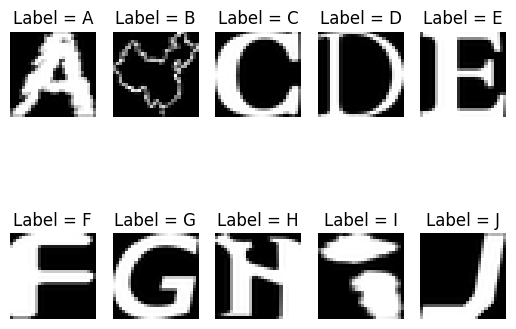

In [7]:
images = []
for i in tqdm(range(len(train_datasets))):
  set_filename = train_datasets[i]

  with open(set_filename, 'rb') as f:
    dataset = pickle.load(f)

  images.append(dataset[i])

print(np.shape(images))

Row = 2
Column = 5
for i, image in enumerate(images):
  plt.subplot(Row, Column, i+1)
  plt.title("Label = {}".format(os.path.basename(train_datasets[i])[0]))
  plt.imshow(image, cmap='gray')
  plt.axis('off')
plt.show()

### 5. Checking the numberof letters in the training dataset & test dataset

In [8]:
print("==== Data for Training ====")
for i in range(len(train_datasets)):
  set_filename = train_datasets[i]

  with open(set_filename, 'rb') as f:
    dataset = pickle.load(f)

  print("The number of letters in class {} is {}.".format(os.path.basename(set_filename)[0], len(dataset)))

print("\n==== Data for Test ====")
for i in range(len(test_datasets)):
  set_filename = test_datasets[i]

  with open(set_filename, 'rb') as f:
    dataset = pickle.load(f)

  print("The number of letters in class {} is {}.".format(os.path.basename(set_filename)[0], len(dataset)))

==== Data for Training ====
The number of letters in class A is 52909.
The number of letters in class B is 52911.
The number of letters in class C is 52912.
The number of letters in class D is 52911.
The number of letters in class E is 52912.
The number of letters in class F is 52912.
The number of letters in class G is 52912.
The number of letters in class H is 52912.
The number of letters in class I is 52912.
The number of letters in class J is 52911.

==== Data for Test ====
The number of letters in class A is 1872.
The number of letters in class B is 1873.
The number of letters in class C is 1873.
The number of letters in class D is 1873.
The number of letters in class E is 1873.
The number of letters in class F is 1872.
The number of letters in class G is 1872.
The number of letters in class H is 1872.
The number of letters in class I is 1872.
The number of letters in class J is 1872.


### 6. Merging all the letter classses into a single dataset (train&test)

In [9]:
def merge_datasets(pickle_files, dataset_size):
  num_classes = len(pickle_files)
  dataset = np.ndarray((dataset_size, image_size, image_size), dtype=np.float32)
  labels = np.ndarray(dataset_size, dtype=np.int32)
  tsize_per_class = dataset_size // num_classes

  start_t = 0
  end_t = tsize_per_class

  for label, pickle_file in enumerate(pickle_files):
    with open(pickle_file, 'rb') as f:
      letter_set = pickle.load(f)
      np.random.shuffle(letter_set)

      letter = letter_set[0:tsize_per_class, :, :]
      dataset[start_t:end_t, :, :] = letter
      labels[start_t:end_t] = label

      start_t += tsize_per_class
      end_t += tsize_per_class

  return dataset, labels

train_size = 200000
test_size = 10000

train_dataset, train_labels = merge_datasets(train_datasets, train_size)
test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print("Training:", train_dataset.shape, train_labels.shape)
print("Testing:", test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Testing: (10000, 28, 28) (10000,)


### 7. Shuffling the dataset

In [10]:
def shuffle(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])

  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]

  return shuffled_dataset, shuffled_labels

train_dataset, train_labels = shuffle(train_dataset, train_labels)
test_dataset, test_labels = shuffle(test_dataset, test_labels)

### 8. Visualization

==== Training Data Samples =====


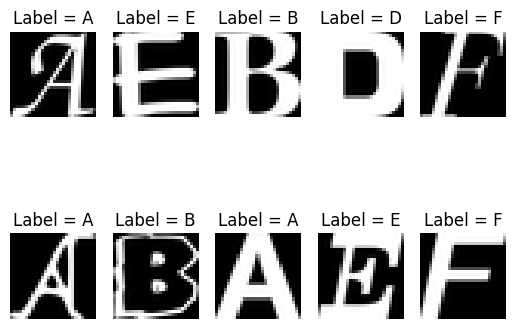

==== Test Data Samples =====


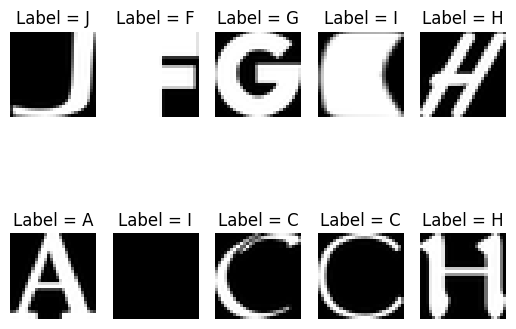

In [11]:
Row = 2
Column = 5
ListOfLabel = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

print("==== Training Data Samples =====")
images = train_dataset[0:10]
labels = train_labels[0:10]

for i, image in enumerate(images):
  plt.subplot(Row, Column, i+1)
  plt.title("Label = {}".format(ListOfLabel[labels[i]]))
  plt.imshow(image, cmap='gray')
  plt.axis('off')

plt.show()

print("==== Test Data Samples =====")
images = test_dataset[0:10]
labels = test_labels[0:10]

for i, image in enumerate(images):
  plt.subplot(Row, Column, i+1)
  plt.title("Label = {}".format(ListOfLabel[labels[i]]))
  plt.imshow(image, cmap='gray')
  plt.axis('off')

plt.show()

### 9. Save the train/test dataset and labels to pickle file

In [12]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

f = open(pickle_file, 'wb')
save = {
    'train_dataset': train_dataset[:50000,],
    'train_labels': train_labels[:50000,],
    'test_dataset': test_dataset[:50000,],
    'test_labels': test_labels[:50000,],
}

pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
f.close()

# Part 2: Defining a Convolutional Neural Network using PyTorch

In [13]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

import os
import random
import numpy as np
from six.moves import range
from six.moves import cPickle as pickle

import matplotlib.pyplot as plt

## 1. Preparing Input Data
---
1. Load the input data as a numpy array
2. Perform appropriate preprocessing
3. Convert that numpy array into `torch.Tensor`
4. Pass it to a dataloader

### 1.1. Loading Dataset

In [14]:
pickle_file = 'data/notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)

  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']

  # Telling the Garbage Collector that it is okay to delete this variable
  del save

  print("Training set", train_dataset.shape, train_labels.shape)
  print("Test set", test_dataset.shape, test_labels.shape)

Training set (50000, 28, 28) (50000,)
Test set (10000, 28, 28) (10000,)


### 1.2. Visualizing Sample Images again

==== Training Data Samples ====
[4 1 4 2 3 7 4 2 0 4]


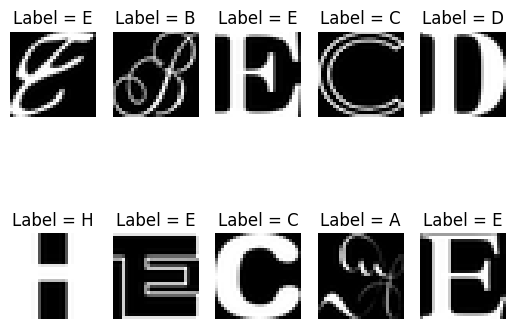

In [15]:
Row = 2
Column = 5
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

print("==== Training Data Samples ====")
rand = random.randint(0, 29989)
images = train_dataset[rand:rand+10]
labels = train_labels[rand:rand+10]
print(labels)

for i, image in enumerate(images):
  plt.subplot(Row, Column, i+1)
  plt.title("Label = {}".format(classes[labels[i]]))
  plt.imshow(image, cmap='gray')
  plt.axis('off')

plt.show()

### 1.3. Preprocessing

In [16]:
image_size = 28
num_labels = 10

x_train = train_dataset.reshape(-1, 1, 28, 28)
x_test = test_dataset.reshape(-1, 1, 28, 28)

y_train = train_labels
y_test = test_labels

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 1, 28, 28) (10000, 1, 28, 28)
(50000,) (10000,)


### 1.4. Converting to a tensor

In [17]:
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train, dtype=torch.int64)

x_test = torch.tensor(x_test)
y_test = torch.tensor(y_test, dtype=torch.int64)

### 1.5. Passing to DataLoader

In [18]:
train_set = torch.utils.data.TensorDataset(x_train, y_train)
test_set = torch.utils.data.TensorDataset(x_test, y_test)

batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                          batch_size=batch_size,
                                          shuffle=False)

### 1.6. Sample Image of Training Data

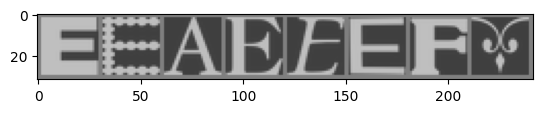

    E     E     A     E     E     E     F     J


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Functions to show an image
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:8]))
# Print labels
print(" ".join('%5s' % classes[labels[j]] for j in range(8)))

### 1.7. Model

In [20]:
import torch.nn as nn

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # 1 input image channel, 6 output channels, 3x3 square convolution
    self.conv1 = nn.Conv2d(1, 6, 3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.relu = nn.ReLU()
    self.fc = nn.Linear(6*14*14, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.pool(x)

    # Flattening
    x = x.view(-1, 6*14*14)

    x = self.fc(x)

    return x

net = Net()

# Part 3: Defining the Loss Function and the Optimizer

In [21]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Part 4: Training & Testing the Model
---

## 1. The Training Process
1. Load data from Data Loader
2. Pass the data to the model and get the output
3. Compute the Loss (via passing the output to the Loss Function)
4. Backpropagation
5. 1 step of Gradient Descent by the Optimizer

In [23]:
loss_history = []

In [25]:
for epoch in range(2):

  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data

    # Batch_first
    # BCHW -> (batch_dim, channel_dim, height, width)

    # Reset the Gradient before each iteration
    optimizer.zero_grad()

    # Training Process
    # Pass the data to the model and get the output
    outputs = net(inputs)
    # Compute the loss via loss function
    loss = criterion(outputs, labels)
    # Backpropagation
    loss.backward()
    # 1 step of Gradient Descent
    optimizer.step()

    # Print the loss
    running_loss += loss.item()
    if i % 300 == 299:

      # Printing the loss of 300 mini-batches
      print("[%d, %5d] loss: %.3f" % (epoch+1, i+1, running_loss/300))

      # Saving the loss for further visualization
      loss_history.append(running_loss/300)
      running_loss = 0.0

print("End of Training")

[1,   300] loss: 1.532
[1,   600] loss: 0.805
[1,   900] loss: 0.727
[1,  1200] loss: 0.728
[1,  1500] loss: 0.702
[1,  1800] loss: 0.665
[1,  2100] loss: 0.670
[1,  2400] loss: 0.674
[1,  2700] loss: 0.659
[1,  3000] loss: 0.670
[2,   300] loss: 0.644
[2,   600] loss: 0.637
[2,   900] loss: 0.631
[2,  1200] loss: 0.616
[2,  1500] loss: 0.652
[2,  1800] loss: 0.629
[2,  2100] loss: 0.600
[2,  2400] loss: 0.593
[2,  2700] loss: 0.594
[2,  3000] loss: 0.618
End of Training


### 1.1. Visualization of the Training Loss

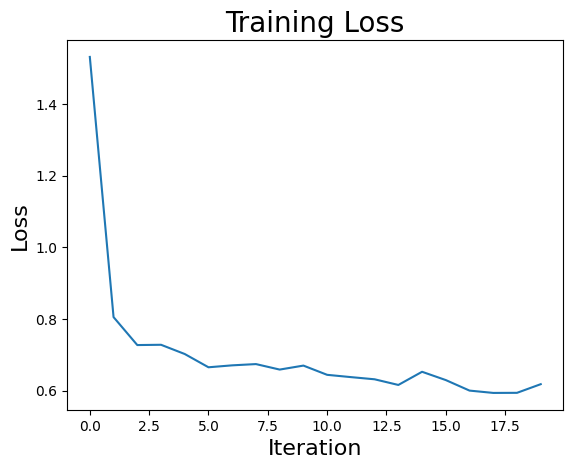

In [26]:
plt.plot(loss_history)
plt.title('Training Loss', fontsize=20)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

## 2. Saving the Trained Model

In [27]:
PATH = "./notmnist_net.pth"
torch.save(net.state_dict(), PATH)

## 3. Test on Test Set

### 3.1. Visualization of Test Images

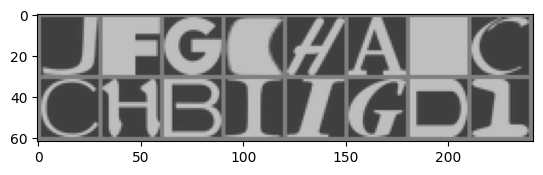

In [28]:
def imshow(img):
  # Un-normalization for visualization
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

### 3.2. Loading parameters from saved model

In [30]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### 3.3. Prediction

In [31]:
outputs = net(images)
outputs

tensor([[-0.1824,  0.4480, -3.1261,  2.4077, -3.8355, -4.5946, -0.2081,  1.5144,
          0.7767,  5.1419],
        [-3.1023,  0.6046, -3.3164,  0.4154,  1.1428,  7.0214,  1.3901, -1.0054,
          1.7036, -2.1712],
        [-0.4139,  0.3006, -1.9779, -0.2465, -0.1776, -0.3152,  5.7352, -2.6040,
         -0.7727,  0.7559],
        [ 0.3554, -3.7776,  2.7407, -4.7557,  3.6130, -1.1613,  2.0642, -0.5603,
          4.3574, -1.6746],
        [ 0.5209,  0.6515, -1.6572, -1.5329,  0.9621,  1.0991, -1.3164,  1.2291,
          0.2667, -0.1871],
        [ 8.0570, -0.3182, -3.9839, -1.7425,  0.8138, -3.0165, -0.1550,  0.8465,
          0.1832, -1.3053],
        [ 0.6257,  0.0356, -1.8340,  0.2227, -0.4509, -1.9793, -0.0490,  0.8447,
          3.9058,  0.2502],
        [-3.4794, -3.5579,  4.5812, -2.7615,  2.0240,  1.2919,  4.1082, -2.4556,
          0.9224,  0.1474],
        [-1.9350, -1.6990,  4.3345, -1.6333,  1.6743, -0.8886,  3.6345, -3.1913,
          0.4991, -1.2888],
        [ 0.6533,  

Model Prediction :      J     F     G     I     H     A     I     C


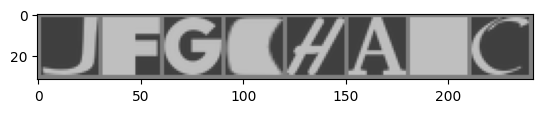

Label:      J     F     G     I     H     A     I     C
Model Prediction:      J     F     G     I     H     A     I     C


In [33]:
# torch.max() -> returning the maximum value and corresponding index
#                of the 1st dimension
_, predicted = torch.max(outputs, 1)

classes = ['A', 'B', 'C', 'D', 'E', 'F','G', 'H', 'I', 'J']

print("Model Prediction : ", " ".join("%5s" % classes[predicted[j]]
                                      for j in range(8)))

imshow(torchvision.utils.make_grid(images[:8]))
print("Label: ", " ".join("%5s" % classes[labels[j]] for j in range(8)))
print("Model Prediction: ", " ".join("%5s" % classes[predicted[j]]
                                     for j in range(8)))

### 3.4. Checking the Accuracy on Test set

In [36]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print("Accuracy on 10000 Test Images: %d %%" % (100 * correct / total))

Accuracy on 10000 Test Images: 89 %


### 3.5. Checking Accuracy for each classes

In [37]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()

    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print("Accuracy for letter %2s : %2d %%" % (
      classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy for letter  A : 87 %
Accuracy for letter  B : 82 %
Accuracy for letter  C : 86 %
Accuracy for letter  D : 92 %
Accuracy for letter  E : 88 %
Accuracy for letter  F : 93 %
Accuracy for letter  G : 93 %
Accuracy for letter  H : 90 %
Accuracy for letter  I : 83 %
Accuracy for letter  J : 90 %
